In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from model import *
from utils import *
from generate import *

# setup stylenet
params = StylenetArgs()
params.gpu = '0'
params.backend = 'cudnn'
params.model_file = '../models/vgg19-d01eb7cb.pth'

dtype, multidevice, backward_device = setup_gpu(params)
stylenet = StyleNet(params, dtype, multidevice, backward_device, verbose=False)


Model setup successfully with parameters:
gpu: 0, optimizer: lbfgs, learning_rate: 1.00, lbfgs_num_correction: 100, pooling: max, model_file: ../models/vgg19-d01eb7cb.pth, False, backend: cudnn, False, content_layers: relu4_2, style_layers: relu1_1,relu2_1,relu3_1,relu4_1,relu5_1, hist_layers: relu2_1,relu3_1,relu4_1,relu5_1, multidevice_strategy: 4,7,29


# Full template

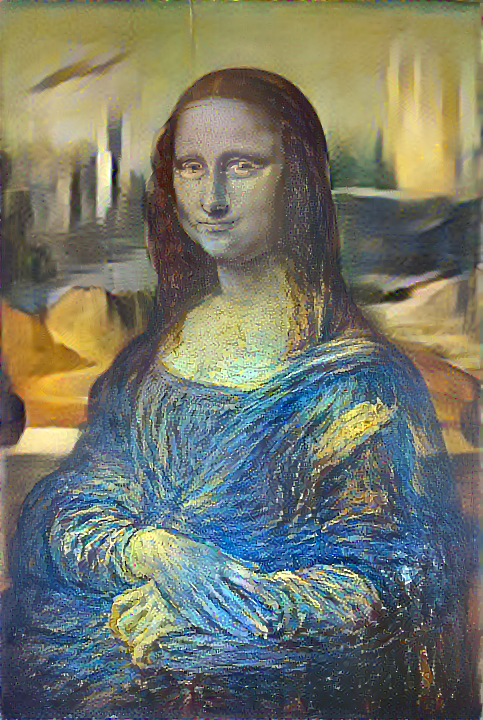

In [2]:
# set stylenet hyper-parameters
#stylenet.set_content_weight(5e2)
#stylenet.set_style_weight(1e2)
#stylenet.set_hist_weight(1e3)
#stylenet.set_style_statistic('gram')
#stylenet.set_tv_weight(1e-2)

# set stylenet style layers individually
#stylenet.set_style_layer(0, 'covariance', 5e3)
#stylenet.set_style_layer(1, 'gram', 1e2)
#stylenet.set_style_layer(2, 'gram', 1e2)
#stylenet.set_style_layer(3, 'gram', 1e2)
#stylenet.set_style_layer(4, 'gram', 1e2)
#stylenet.set_hist_layer(0, 5e1)
#stylenet.set_hist_layer(1, 5e1)
#stylenet.set_hist_layer(2, 5e1)
#stylenet.set_hist_layer(3, 5e1)


# parameters
image_size = 720
style_scale = 1.0

# load content image
content_path = '../images/inputs/monalisa.jpg'
content_image = load_image(content_path, image_size)

# load style images
style_paths = ['../images/inputs/starry_night.jpg',
               '../images/inputs/cubist.jpg']
 
style_size = int(image_size * style_scale)
style_images = [load_image(path, style_size) for path in style_paths]

# load content masks for each style image
content_mask_paths = ['../images/masks/monalisa1b.png',
                      '../images/masks/monalisa1a.png']
content_masks = [load_image(mask, image_size) 
                 for mask in content_mask_paths]

# capture the style and content images
stylenet.capture(content_image, style_images, None, content_masks)

# initialize input image with a random image
# or load it from another image (e.g. content)
input_img = random_tensor_like(content_image)
#input_img = preprocess(load_image('../images/inputs/the_scream.jpg', image_size)) # make sure matches size of content
#input_img = preprocess(load_image(content_path, image_size))

# optimizer
img = optimize(stylenet, 
               input_img, 
               num_iterations=1000,  
               update_iter=100, 
               display_preview=True,
               save_preview=False,
               save_preview_path=None)

img = deprocess(img)

# change back to original colors of content image if you want
#img = original_colors(content_image, img)

save(img, "output_single.png")
display(img)

In [ ]:
# demonstrate multi-resolution